In [2]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (9,6)
from utils import *
from filters import *

In [3]:
delta1,delta2,omega_p,omega_s = 0.15,0.15,1,1.123
myfilter,N,omega_c,poles = Butterworth(delta1,delta2,omega_p,omega_s)

In [4]:
ang_freq = np.linspace(0,1.5*omega_s,1401)
response = np.vectorize(myfilter)(ang_freq*(1j))

mag_resp = np.absolute(response)
phase = np.angle(response)

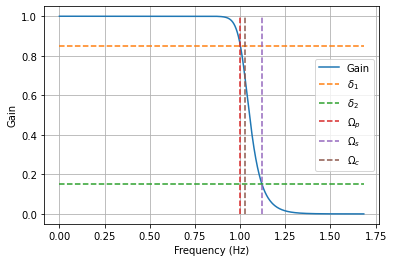

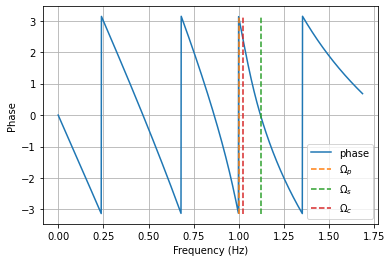

In [5]:
plt.plot(ang_freq,mag_resp,label="Gain")
plt.plot([ang_freq[0],ang_freq[-1]], [1-delta1,1-delta1],'--', label='$\delta_1$')
plt.plot([ang_freq[0],ang_freq[-1]], [delta2,delta2],'--', label='$\delta_2$')
plt.plot([omega_p,omega_p], [0,1],'--', label='$\Omega_p$')
plt.plot([omega_s,omega_s], [0,1],'--', label='$\Omega_s$')
plt.plot([omega_c,omega_c], [0,1],'--', label='$\Omega_c$')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')

plt.savefig('Gain_s_domain.pdf')

plt.show()

plt.plot(ang_freq,phase,label="phase")
plt.plot([omega_p,omega_p], [-pi,pi],'--', label='$\Omega_p$')
plt.plot([omega_s,omega_s], [-pi,pi],'--', label='$\Omega_s$')
plt.plot([omega_c,omega_c], [-pi,pi],'--', label='$\Omega_c$')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase')
plt.grid(True)
plt.legend(loc='best')
plt.savefig('Phase_s_domain.pdf')
plt.show()

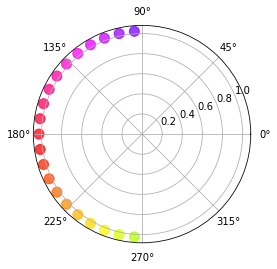

In [6]:
fig = plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(np.angle(poles), np.abs(poles), c=np.angle(poles), s=100, cmap='hsv', alpha=0.75)
plt.savefig('Poles_s_domain.pdf')
